# Objective : Big Mart Sales Prediction
The aim is to build a predictive model and predict the sales of each product at a particular outlet.

# Libraries

In [1]:
# Python Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import seaborn as sns
import matplotlib as plt

# Metrices
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [49]:
# Load Data
train_data= pd.read_csv('train_v9rqX0R.csv')
test_data = pd.read_csv('test_AbJTz2l.csv')

print(train_data.shape, test_data.shape)

(8523, 12) (5681, 11)


In [3]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train_data.duplicated().sum()

0

In [21]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
train_data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Observation
1. rows: 8523 Columns:12
2. Target Column - Item_Outlet_Sales
3. Missing Data -  Item_Weight(1463) and Outlet_Size(2410)
4. Data Type: float64 - 4, int64- 1 and Object - 7

In [7]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000232FE9251C0>,
      dtype=object)

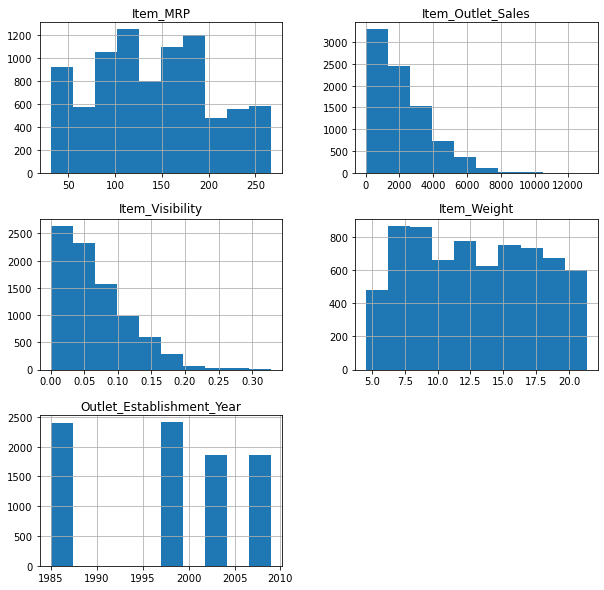

In [8]:
# Data Distribution
train_data.hist(figsize=(10,10))

In [9]:
# Correlation
train_data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


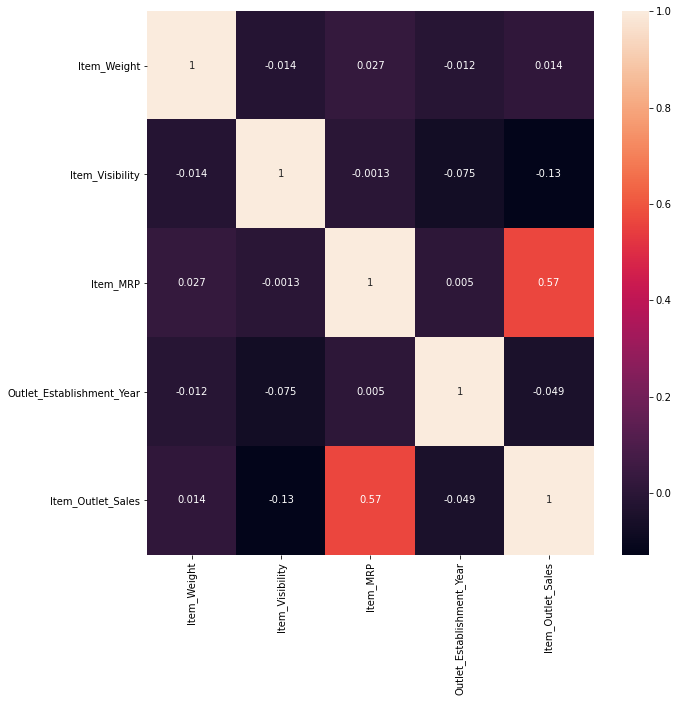

In [10]:
# Heat Map
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(train_data.corr(), annot=True)

In [23]:
train_data.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [71]:
# Replace LF, low fat with Low Fat and reg to Regular
train_data.Item_Fat_Content.replace(['LF','low fat'], value= 'Low Fat', inplace= True)
train_data.Item_Fat_Content.replace(['reg'], value= 'Regular', inplace= True)

In [72]:
train_data["Item_Weight"].mean(), train_data["Item_Weight"].median()

(12.882080840080157, 13.0)

1. train_data["Item_Weight"] - Filling null value with mean will be prone to outlier as its not normal distribution

In [73]:
train_data["Item_Weight"].replace(to_replace=np.nan,value=round(train_data['Item_Weight'].median()),inplace=True)

In [109]:
# Filling Null with mode : Feature- "Outlet_Size"
train_data["Outlet_Size"].fillna(value= "Medium",inplace=True)

In [110]:
train_data["Outlet_Size"].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [119]:
from datetime import date
today_date= date.today()
train_data['Years_Establishment'] = train_data.Outlet_Establishment_Year.apply(lambda x: today_date.year - x)
test_data['Years_Establishment'] = test_data.Outlet_Establishment_Year.apply(lambda x: today_date.year - x)

In [120]:
train_data.drop(['Outlet_Establishment_Year'], axis = 1, inplace = True)
test_data.drop(['Outlet_Establishment_Year'], axis = 1, inplace = True)

In [111]:
# Split the Data
from sklearn.model_selection import train_test_split

X= train_data.drop(['Item_Identifier','Item_Outlet_Sales'],axis=1)
y= train_data['Item_Outlet_Sales']

In [112]:
X.Outlet_Size.isnull().sum()

0

In [113]:
X.select_dtypes(include=object).columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [114]:
# Label Encoder - Training Data & Test Data
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
# one hot encode input variables
le= LabelEncoder()

for feature in X.columns: # Loop through all columns in the dataframe
    if X[feature].dtype == object: # Only apply for columns with categorical strings
        X[feature]= le.fit_transform(X[feature])

Item_Fat_Content
Item_Type
Outlet_Identifier
Outlet_Size
Outlet_Location_Type
Outlet_Type


Item_Identifier
Item_Fat_Content
Item_Type
Outlet_Identifier
Outlet_Size
Outlet_Location_Type
Outlet_Type


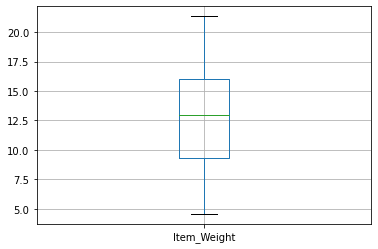

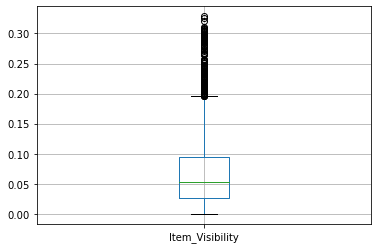

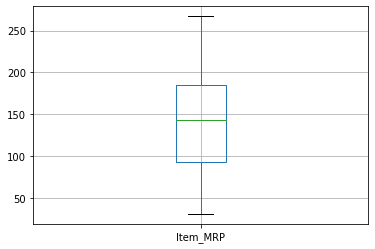

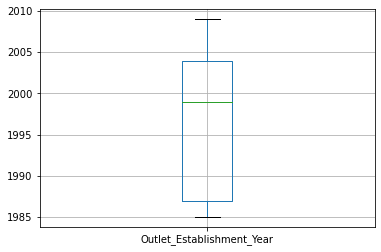

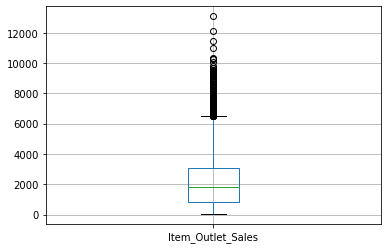

In [20]:
# Box Plot for Outliers
for columns in train_data:
    if train_data[columns].dtypes == object:
        print(columns)
        
    else:    
        plt.figure()
        train_data.boxplot([columns])

In [117]:
# Split train and test Data
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 7)# Stratify y to keep the class proportions consistent
# Print the number of train and test records.
print("Train Data:",X_train.shape)
print("Test Data:",X_test.shape)

Train Data: (6392, 10)
Test Data: (2131, 10)


# Model Building

In [151]:
# Linear Regression
from sklearn.linear_model import LinearRegression

lr= LinearRegression()
lr.fit(X_train, y_train)

lr_prediction = lr.predict(X_test)

lr_r2score = r2_score(y_test, lr_prediction)
lr_mae = mean_absolute_error(y_test, lr_prediction)
lr_mse = mean_squared_error(y_test, lr_prediction)

print(lr_r2score, lr_mae , lr_mse)

0.4945568894546756 915.8075974482781 1495057.7402102016


In [126]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(X_train, y_train)
predictions = rf_model.predict(X_test)

rf_r2score = r2_score(y_test, predictions)
rf_mae = mean_absolute_error(y_test, predictions)
rf_mse = mean_squared_error(y_test, predictions)

print(rf_r2score, rf_mae , rf_mse)

0.5436956717067009 805.8736065875175 1349709.4008666659


In [122]:
# XGBoost
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=1000)
# Add silent=True to avoid printing out updates with each cycle
xgb_model.fit(X_train, y_train, verbose=False)
predictions = xgb_model.predict(X_test)

xgb_mae = mean_absolute_error(y_test, predictions)
xgb_mse = mean_squared_error(y_test, predictions)
xgb_r2score = r2_score(y_test, predictions)

print(xgb_r2score, xgb_mae , xgb_mse)

0.4412779059513091 905.0171058546408 1652652.4427896854


# Hyper-parameter tuning

In [123]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

criterion = ['gini', 'entropy']
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [124]:
# Fetch the best parameters
from sklearn.ensemble import RandomForestRegressor
rf_model2 = RandomForestRegressor(random_state=1)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

from sklearn.model_selection import RandomizedSearchCV
rf_random2 = RandomizedSearchCV(estimator = rf_model2, param_distributions = random_grid, n_iter = 10, 
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random2.fit(X_train, y_train)
# fetch the best parameters
params = rf_random2.best_params_
params

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.0min finished


{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [125]:
rf_model2 = RandomForestRegressor(n_estimators= params['n_estimators'],min_samples_split= params['min_samples_split'],
                                  min_samples_leaf=params['min_samples_leaf'],max_features= params['max_features'], 
                                  max_depth= params['max_depth'], bootstrap= True)

rf_model2.fit(X_train, y_train)
predictions = rf_model2.predict(X_test)


rf2_r2score = r2_score(y_test, predictions)
rf2_mae = mean_absolute_error(y_test, predictions)
rf2_mse = mean_squared_error(y_test, predictions)
print(rf2_r2score,rf2_mae,rf2_mse)

0.5681855822376549 784.7489657713802 1277270.3280363812


In [152]:
# xgb_r2score, xgb_mae , xgb_mse - xgb_model
# rf_r2score, rf_mae , rf_mse - rf_model
# rf2_r2score,rf2_mae,rf2_mse - rf_model2
# lr_r2score, lr_mae , lr_mse
MAE= [lr_mae, rf_mae, rf2_mae, xgb_mae]
MSE= [lr_mse, rf_mse, rf2_mse, xgb_mse]
R_score= [lr_r2score, rf_r2score, rf2_r2score, xgb_r2score]
# Cross_score= [LR_CS,RFR_CS,LS_CS,XGB_CS,RD_CS]
Models = pd.DataFrame({
 'Models': ["Linear Regression","Random Forest Regression","Random Forest Regressor_Parameter tuning","XGB Regressor"],
 'MAE': MAE, 'MSE': MSE, 'R^2':R_score})
Models.sort_values(by='MAE', ascending=True)

,Models,MAE,MSE,R^2
2,Random Forest Regressor_Parameter tuning,784.748966,1.277270e+06,0.568186
1,Random Forest Regression,805.873607,1.349709e+06,0.543696
3,XGB Regressor,905.017106,1.652652e+06,0.441278
0,Linear Regression,915.807597,1.495058e+06,0.494557


# Remove outlier/ setting the upper and lower limit

In [131]:
# Quartile
Q1= train_data.Item_Visibility.quantile(0.25) #anything above is outlier
Q3 = train_data.Item_Visibility.quantile(0.75)
print(Q1, Q3)

0.026989477499999998 0.0945852925


In [132]:
IQR = Q3- Q1

In [133]:
lower_limit = Q1- 1.5* IQR
upper_limit = Q3+  1.5* IQR

In [135]:
train_data[(train_data.Item_Visibility < lower_limit)| (train_data.Item_Visibility > upper_limit)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Establishment
49,FDS02,13.00,Regular,0.255395,Dairy,196.8794,OUT019,Small,Tier 1,Grocery Store,780.3176,36
83,NCL18,13.00,Low Fat,0.293418,Household,194.6136,OUT019,Small,Tier 1,Grocery Store,583.2408,36
108,DRE60,13.00,Low Fat,0.278974,Soft Drinks,225.3720,OUT019,Small,Tier 1,Grocery Store,679.1160,36
174,FDI32,17.70,Low Fat,0.291865,Fruits and Vegetables,115.1834,OUT010,Medium,Tier 3,Grocery Store,345.5502,23
334,FDC41,13.00,Low Fat,0.204700,Frozen Foods,76.8670,OUT019,Small,Tier 1,Grocery Store,229.7010,36
...,...,...,...,...,...,...,...,...,...,...,...,...
8292,FDF56,13.00,Regular,0.209163,Fruits and Vegetables,179.1976,OUT019,Small,Tier 1,Grocery Store,543.2928,36
8345,FDY28,13.00,Regular,0.266397,Frozen Foods,215.6218,OUT019,Small,Tier 1,Grocery Store,641.1654,36
8371,DRA59,8.27,Regular,0.214125,Soft Drinks,183.9924,OUT010,Medium,Tier 3,Grocery Store,185.0924,23
8432,FDI16,14.00,Regular,0.227261,Frozen Foods,54.3640,OUT010,Medium,Tier 3,Grocery Store,159.7920,23


In [136]:
# Remove Outliers
train_data_nooutlier= train_data[(train_data.Item_Visibility > lower_limit)& (train_data.Item_Visibility < upper_limit)]

In [137]:
train_data_nooutlier.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Establishment
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,12
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,23
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,34


In [142]:
train_data_nooutlier["Item_Weight"].value_counts()

13.000    1426
12.150      85
17.600      82
13.650      77
11.800      76
          ... 
7.605        1
7.685        1
9.420        1
5.400        1
6.520        1
Name: Item_Weight, Length: 415, dtype: int64

In [145]:
# Split the Data
from sklearn.model_selection import train_test_split

X_outlier= train_data_nooutlier.drop(['Item_Identifier','Item_Outlet_Sales'],axis=1)
y_outlier= train_data_nooutlier['Item_Outlet_Sales']

In [146]:
# Split train and test Data
X_train_O, X_test_O, y_train_O, y_test_O = train_test_split(X_outlier, y_outlier,random_state = 7)# Stratify y to keep the class proportions consistent
# Print the number of train and test records.
print("Train Data:",X_train_O.shape)
print("Test Data:",X_test_O.shape)

Train Data: (6284, 10)
Test Data: (2095, 10)


In [148]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(X_train_O, y_train_O)
rf_prediction_O = rf_model.predict(X_test_O)
rf_r2score_O = r2_score(y_test_O, rf_prediction_O)
print(rf_r2score_O)

0.5392102299570238


In [150]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=1000)
# Add silent=True to avoid printing out updates with each cycle
xgb_model.fit(X_train_O, y_train_O, verbose=False)
xgb_prediction_O = xgb_model.predict(X_test_O)

mae = mean_absolute_error(xgb_prediction_O, y_test_O)
xgb_r2score_O = r2_score(y_test_O, xgb_prediction_O)
print(xgb_r2score_O)

0.4399293823364411


1. Even after removing Outliers no improvement in the performance seen
without Outlier - 
with outlier- 